In [4]:
import os
import zipfile

local_zip = '/content/squares.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()



In [5]:
a_dir = os.path.join('/content/squares/train/a')
b_dir = os.path.join('/content/squares/train/b')
c_dir = os.path.join('/content/squares/train/c')

print('total training a images:', len(os.listdir(a_dir)))
print('total training b images:', len(os.listdir(b_dir)))
print('total training c images:', len(os.listdir(c_dir)))

a_files = os.listdir(a_dir)
print(a_files[:10])

b_files = os.listdir(b_dir)
print(b_files[:10])

c_files = os.listdir(c_dir)
print(c_files[:10])

total training a images: 501
total training b images: 501
total training c images: 500
['351.png', '413.bmp', '493.jpg', '36.jpg', '313.bmp', '160.png', '111.png', '459.png', '357.jpg', '377.jpg']
['351.png', '413.bmp', '493.jpg', '36.jpg', '313.bmp', '160.png', '111.png', '459.png', '357.jpg', '377.jpg']
['351.png', '413.bmp', '493.jpg', '36.jpg', '313.bmp', '160.png', '111.png', '459.png', '357.jpg', '377.jpg']


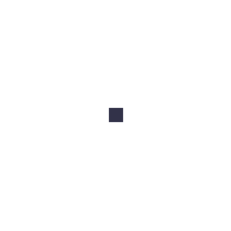

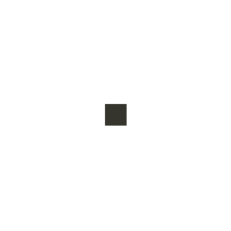

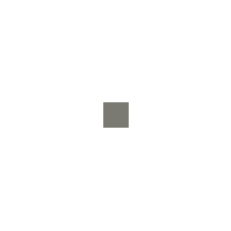

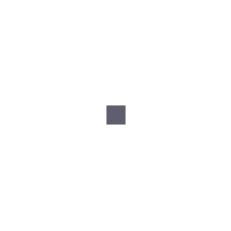

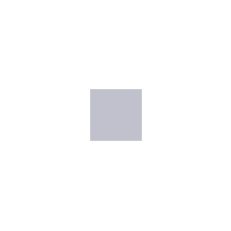

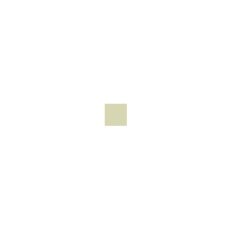

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_a = [os.path.join(a_dir, fname)
                for fname in a_files[pic_index-2:pic_index]]
next_b = [os.path.join(b_dir, fname)
                for fname in b_files[pic_index-2:pic_index]]
next_c = [os.path.join(c_dir, fname)
                for fname in c_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_a+next_b+next_c):
  # print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [7]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator


Without Image Augmentation

In [14]:

TRAINING_DIR = "/content/squares/train"
training_datagen = ImageDataGenerator(      
    rescale = 1./255
      )

VALIDATION_DIR = "/content/squares/val"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical'
)



Found 1500 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [15]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [9]:
class CustomCallback(tf.keras.callbacks.Callback):

	def on_epoch_end(self, epoch, logs=None):

		if logs is None:
			logs = {}

		if logs.get("accuracy") > logs.get("val_accuracy") and \
			((logs.get("accuracy") - logs.get("val_accuracy")) > 0.05):
			self.model.stop_training = True

In [16]:

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=50, validation_data = validation_generator, verbose = 1,callbacks=[CustomCallback()])

model.save("applev1.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
47/47 [==============================] - 11s 224ms/step - loss: 1.0459 - accuracy: 0.5353 - val_loss: 0.4338 - val_accuracy: 0.8380
Epoch 2/50
47/47 [==============================] - 10s 215ms/step - loss: 0.7266 - accuracy: 0.7560 - val_loss: 0.2516 - val_accuracy: 0.9260
Epoch 3/50
47/47 [==============================] - 10s 214ms/step - loss: 0.6328 - accuracy: 0.8453 - val_loss: 0.2739 - val_accuracy: 0.9380
Epoch 4/50
47/47 [==============================] - 10s 213ms/step - loss: 0.2881 - accuracy: 0.9107 - val_loss: 0.0930 - val_accuracy: 0.9707
Epoch 5/50
47/47 [==============================] - 10s 215ms/step - loss: 0.3123 - accuracy: 0.9193 - val_loss: 0.5775 - val_accuracy: 0.7533


Without image augmentation

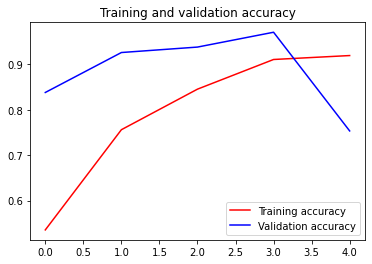

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [18]:
#uploading imageto test
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving 1.bmp to 1 (1).bmp
1.bmp
[[1. 0. 0.]]


Uploaded an image from class A & the prediction was class A !

#with image augmentation 

In [10]:

TRAINING_DIR = "/content/squares/train"
training_datagen = ImageDataGenerator(      
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
      )

VALIDATION_DIR = "/content/squares/val"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical'
)



Found 1500 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [11]:

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=50, validation_data = validation_generator, verbose = 1,callbacks=[CustomCallback()])

model.save("apple.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
47/47 [==============================] - 21s 388ms/step - loss: 0.8410 - accuracy: 0.6067 - val_loss: 0.6259 - val_accuracy: 0.6807
Epoch 2/50
47/47 [==============================] - 17s 368ms/step - loss: 0.3311 - accuracy: 0.8813 - val_loss: 0.2246 - val_accuracy: 0.9233
Epoch 3/50
47/47 [==============================] - 17s 371ms/step - loss: 0.2273 - accuracy: 0.9160 - val_loss: 0.2364 - val_accuracy: 0.9347
Epoch 4/50
47/47 [==============================] - 18s 380ms/step - loss: 0.1137 - accuracy: 0.9653 - val_loss: 0.0750 - val_accuracy: 0.9800
Epoch 5/50
47/47 [==============================] - 18s 379ms/step - loss: 0.0956 - accuracy: 0.9673 - val_loss: 0.2749 - val_accuracy: 0.9160


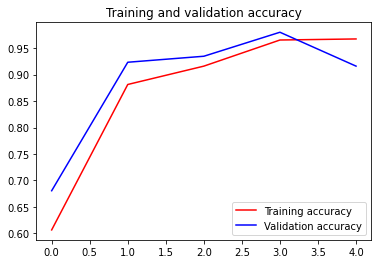

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [13]:
#uploading imageto test
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving 1.bmp to 1.bmp
1.bmp
[[1. 0. 0.]]


Uploaded an image from class A & the prediction was class A !
